In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# First Dataset: "games_details.csv"

Have a look to the Datasets, one at a time. Firstly, "games_details.csv".

In [2]:
games_details = pd.read_csv('../dataset/games_details.csv', low_memory=False)
games_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [3]:
# This function counts the number of missing values in the column
counter = 0
DNP_criterion = games_details['COMMENT'] == 'DNP - Coach\'s Decision'
for value in DNP_criterion:
    if value:
        counter += 1
print(f"{counter/games_details.shape[0]*100}%") # print percentage of missing numbers
# # le altre colonne sono vuote quindi possiamo direttamente droppare la colonna

8.682555920481942%


Since the number of valid values is very little wrt the size of the Dataset and there are not clear solutions to fill empty cells, we drop it.

For the start position, the number of missing values is very high (around 60%), suggesting to drop the column instead. Indeed, while even dropping that amount of rows would not cause troubles given the huge dimension of the dataset, the missing values probably refer to players which are not starters but of which it could be interesting to know the stats nevertheless.

In [4]:
counter = 0
start_postion_criterion = pd.isna(games_details['START_POSITION'])
for i in start_postion_criterion:
    if i:
        counter += 1
print(f"{counter/games_details.shape[0]*100}%") # percentage of missing values. Useful, so we actually drop the
# rows with missing data arather than the whole column

nan_count = games_details['START_POSITION'].isna().sum()

print(games_details.columns.tolist())

# qua percentuale grande, quindi droppiamo la colonna per evitare di dover droppare più di metà
# del dataset (questi  sono presumibilmente i sostituti, quindi potrebbe evere senso sapere
# come fanno loro)

61.7477880076814%
['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']


Moreover, we drop all the columns we think could lead to information leakage and also all columns that we think are not useful in the training model, such as the Nickname of the player. Our cleaned Dataset is the following

In [5]:
games_details = games_details.drop(columns=['MIN','COMMENT', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'TEAM_CITY', 'TEAM_ABBREVIATION', 'FGA', 'FG_PCT', 'FGM', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']) # se non conta, si toglie. Altrimenti
# modificarla cambia il risultato
games_details = games_details[~DNP_criterion] # droppiamo righe relative a DNP
# queste potremmo anche non dropparle ora, tanto poi dropperemo tutte quelle con NaN o missing values
games_details = games_details.reset_index(drop=True) # adjust indexing
games_details.info()
games_details.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610574 entries, 0 to 610573
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   GAME_ID    610574 non-null  int64  
 1   TEAM_ID    610574 non-null  int64  
 2   PLAYER_ID  610574 non-null  int64  
 3   FG3M       558938 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 18.6 MB


,GAME_ID,TEAM_ID,PLAYER_ID,FG3M
0,22200477,1610612759,1629641,0.0
1,22200477,1610612759,1631110,2.0
2,22200477,1610612759,1627751,0.0
3,22200477,1610612759,1630170,1.0
4,22200477,1610612759,1630200,1.0


# Second Dataset: "games.csv"

Now, pass to the second Dataset, which is "games.csv".

In [6]:
games = pd.read_csv('../dataset/games.csv')
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [7]:
counter = 0
game_status_text_criterion = games['GAME_STATUS_TEXT'] == 'Final'
for i in game_status_text_criterion:
    counter += 1
print(f"{counter/games.shape[0]}%") # percentage of missing values

1.0%


So, we can drop that column.

In [8]:
games = pd.read_csv('../dataset/games.csv')
games.info()
games = games.drop(columns=['GAME_STATUS_TEXT'])
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [9]:
#games_details = games_details.sample(frac=0.35) # solo  in fase di sviluppo, riduce dimensione


def get_opposing_team_id(row):
    game_id = row['GAME_ID']
    team_id = row['TEAM_ID']
    opposing_team_id = None
    
    game_row = games[games['GAME_ID'] == game_id]
    
    if team_id == game_row['HOME_TEAM_ID'].values[0]:
        opposing_team_id = game_row['VISITOR_TEAM_ID'].values[0]
    else:
        opposing_team_id = game_row['HOME_TEAM_ID'].values[0]
    
    return opposing_team_id

games_details.loc[:, 'OPPOSING_TEAM_ID'] = games_details.apply(get_opposing_team_id, axis=1)

In [10]:
merged_df = pd.merge(games_details, games, on='GAME_ID', how='left')

def get_location(row):
    if row['TEAM_ID'] == row['HOME_TEAM_ID']:
        return 'Home'
    elif row['TEAM_ID'] == row['VISITOR_TEAM_ID']:
        return 'Away'
    else:
        return 'Unknown'

games_details.loc[:, 'LOCATION'] = merged_df.apply(get_location, axis=1)

In [11]:
merged_df_season = pd.merge(games_details, games[['GAME_ID', 'SEASON']], on='GAME_ID', how='left')

def get_season(row):
    return row['SEASON']
    
games_details['SEASON'] = merged_df_season.apply(get_season, axis=1)


In [12]:
games_details.head(10)
games_details['GAME_ID'].astype(str)
games_details['TEAM_ID'].astype(str)
games_details['OPPOSING_TEAM_ID'].astype(str) # trasformare in stringhe nome così  da non lavorare
# con numeri enormi vicini ma usare l'encoder e pace
print(games_details.shape)
games_details.head()
num_missing_rows = games_details.isna().any(axis=1).sum()
print(f"{num_missing_rows/games_details.shape[0]*100}%")
games_details = games_details.dropna() # drop all the rows with nans

(610574, 7)
8.456960171903816%


# *Nota*:
qua ci sono un sacco di valori mancanti. Facendolo con tutto il dataset, la cifra diminuisce (anzi, credo che non ne vengano praticamente aggiunti), ma quando il dataset è incompleto, le funzioni che ho scritto non vanno correttamente perché  è possibile che droppando le righe si perdano informazioni che permettono di collegare un dataset all'altro

# Third Dataset: "ranking.csv"

In [13]:
ranking = pd.read_csv('../dataset/ranking.csv')
ranking.info()
ranking = ranking.drop(columns=['LEAGUE_ID', 'RETURNTOPLAY']) # se soli zeri/NaN: rimosse
ranking.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210342 entries, 0 to 210341
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        210342 non-null  int64  
 1   LEAGUE_ID      210342 non-null  int64  
 2   SEASON_ID      210342 non-null  int64  
 3   STANDINGSDATE  210342 non-null  object 
 4   CONFERENCE     210342 non-null  object 
 5   TEAM           210342 non-null  object 
 6   G              210342 non-null  int64  
 7   W              210342 non-null  int64  
 8   L              210342 non-null  int64  
 9   W_PCT          210342 non-null  float64
 10  HOME_RECORD    210342 non-null  object 
 11  ROAD_RECORD    210342 non-null  object 
 12  RETURNTOPLAY   3990 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 20.9+ MB


,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
0,1610612743,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8
1,1610612763,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9
2,1610612740,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8
3,1610612756,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9
4,1610612746,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7


# Fourth Dataset: "teams.csv"

In [14]:
teams = pd.read_csv('../dataset/teams.csv')
teams.info()
teams.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     object 
 5   NICKNAME            30 non-null     object 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     object 
 8   ARENA               30 non-null     object 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null     object 
 11  GENERALMANAGER      30 non-null     object 
 12  HEADCOACH           30 non-null     object 
 13  DLEAGUEAFFILIATION  30 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [15]:
teams = teams.drop(columns=['LEAGUE_ID', 'MAX_YEAR']) # max year: 2019
teams.head()

,TEAM_ID,MIN_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,1610612737,1949,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,1610612738,1946,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,1610612740,2002,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,1610612741,1966,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,1610612742,1980,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


Looking the Dataset we can notice that some arena capacity values are missing. We've decided to fill it searching the values on google:\
-Smoothie King Center: 17,805 seats;\
-Barclays Center: 17.732 seats;\
-Wells Fargo Center: 20,318 seats;\
-Talking Stick Resort Arena: 17,071 seats;

Moreover, Amway Center capcity seems to be wrong because its value is 0. So, we correct it:\
-Amway Center: 18,846 seats

In [16]:
teams.loc[2, 'ARENACAPACITY'] = 17805.0
teams.loc[12, 'ARENACAPACITY'] = 17732.0
teams.loc[14, 'ARENACAPACITY'] = 18846.0
teams.loc[16, 'ARENACAPACITY'] = 20318.0
teams.loc[17, 'ARENACAPACITY'] = 17071.0

In [17]:
teams

,TEAM_ID,MIN_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,1610612737,1949,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,1610612738,1946,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,1610612740,2002,NOP,Pelicans,2002,New Orleans,Smoothie King Center,17805.0,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,1610612741,1966,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,1610612742,1980,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,1610612743,1976,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,1610612745,1967,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,1610612746,1970,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,1610612747,1948,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,1610612748,1988,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


Non dare esito della partita (non disponibile al momento della previsione)
Tirare fuori team id (team_city buttato via perché coincide quasi del tutto con team_id)

```python
def test(dataframe, column, counter = 0):
    for i in range(3, len(dataframe[column])-1):
        if (dataframe[column]).iloc[i-1]!=(dataframe[column]).iloc[i]:
            counter+=1
    print(counter)
    return


test(games_details, 'TEAM_ID')
test(games_details, 'TEAM_CITY')
```



***Aggiungere***: stagione/data, distanza temporale dalla partita prima


MINUTI??? Conoscenza del futuro migliora capacità di previsione ma non legittimo.

# Last but not least Dataset: "players.csv"

In [18]:
players = pd.read_csv('../dataset/players.csv')
players.info()
players

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER_NAME  7228 non-null   object
 1   TEAM_ID      7228 non-null   int64 
 2   PLAYER_ID    7228 non-null   int64 
 3   SEASON       7228 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 226.0+ KB


,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
...,...,...,...,...
7223,Lanny Smith,1610612758,201831,2009
7224,Warren Carter,1610612752,201999,2009
7225,Bennet Davis,1610612751,201834,2009
7226,Brian Hamilton,1610612751,201646,2009


# Learning phase

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# label encoder e non one-hot encoding per evitare di aumentare di molto
# dimensionalità del dataset e perché le date e simili hanno effettivamente un ordine

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

We will evaluate the performance of the regression algorithms via k-fold cross-validation.
Before doing that, we choose hyperparameters by means of hyperparameter tuning (quelli su RF sono in realtà più o meno inutili perché si sa già la tendenza al variare di $n_{trees}$ e si ha già la $p$ ottimale. Ma già che c'eravamo...)

To understand the importance of each variable during the decision process, Gini importance is not as effective as feature ablation. Yet the latter is not implemented in scikit-learn, therefore we use Gini as measurement of the importance of variables.

In [20]:
games_details = games_details.sample(frac=0.05) 

categorical_columns = games_details.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
games_details[list(categorical_columns)] = games_details[list(categorical_columns)].apply(label_encoder.fit_transform)

games_details = games_details.dropna()

X = games_details.loc[:, games_details.columns != 'FG3M']
y = games_details['FG3M']

reg_metrics = pd.DataFrame(columns=['Model', 'MAE', 'MSE'])

In [26]:
num_folds = 5

num_features = X.shape[1]
p = int(np.ceil(num_features / 3))
rf_param_grid = {
    'n_estimators': [50, 100, 500],
    'max_features': ['sqrt', 'log2', p] 
}

rf_regressor = RandomForestRegressor()
scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(X) # questo non sarebbe legittimo

grid_search = GridSearchCV(rf_regressor, rf_param_grid, cv=num_folds, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

rf_best_params = grid_search.best_params_
print(rf_best_params)

{'max_features': 2, 'n_estimators': 500}


In [28]:
rf_kfolds = KFold(n_splits=num_folds, shuffle=True)
gini_importances = pd.DataFrame(columns=X.columns)

for fold, (train_idx, test_idx) in enumerate(rf_kfolds.split(X)):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    rf_regressor = RandomForestRegressor(n_estimators = rf_best_params['n_estimators'], max_features = rf_best_params['max_features'])
    
    rf_regressor.fit(X_train, y_train)
    
    y_pred = rf_regressor.predict(X_test)
    
    current_rf_mae = mean_absolute_error(y_test, y_pred)
    current_rf_mse = mean_squared_error(y_test, y_pred)
    
    reg_metrics.loc[len(reg_metrics)] = ['RF', current_rf_mae, current_rf_mse]

    importances = rf_regressor.feature_importances_
    gini_importances.loc[fold] = importances

In [29]:
dummy_kfolds = KFold(n_splits=num_folds, shuffle=True)

for train_idx, test_idx in dummy_kfolds.split(X):
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    dummy_regressor = DummyRegressor()
    dummy_regressor.fit(X_train, y_train)
    
    y_dummy_pred = dummy_regressor.predict(X_test)

    current_dummy_mae = mean_absolute_error(y_test, y_dummy_pred)
    current_dummy_mse = mean_squared_error(y_test, y_dummy_pred)

    reg_metrics.loc[len(reg_metrics)] = ['DUMMY', current_dummy_mae, current_dummy_mse]

In [30]:
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'p': [1, 2]
}

knn_regressor = KNeighborsRegressor()

grid_search = GridSearchCV(knn_regressor, knn_param_grid, cv=num_folds, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y)

knn_best_params = grid_search.best_params_
print(knn_best_params)

{'n_neighbors': 9, 'p': 2}


In [32]:
knn_kfolds = KFold(n_splits=num_folds, shuffle=True)

for train_idx, test_idx in knn_kfolds.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    knn_regressor = KNeighborsRegressor(n_neighbors = knn_best_params['n_neighbors'], p = knn_best_params['p'])
    knn_regressor.fit(X_train, y_train)
    
    y_pred = knn_regressor.predict(X_test)
    
    current_knn_mae = mean_absolute_error(y_test, y_pred)
    current_knn_mse = mean_squared_error(y_test, y_pred)
    
    reg_metrics.loc[len(reg_metrics)] = ['KNN', current_knn_mae, current_knn_mse]

In [33]:
svm_param_grid = {
    'C': [0.1, 1, 3],
    'gamma': [0.01, 0.1, 1]
}

sv_regressor = SVR()

grid_search_svm = GridSearchCV(sv_regressor, svm_param_grid, cv=num_folds, scoring='neg_mean_squared_error')
grid_search_svm.fit(X_scaled, y)

svm_best_params = grid_search_svm.best_params_
print(svm_best_params)

{'C': 3, 'gamma': 1}


In [34]:
sv_kfolds = KFold(n_splits=num_folds, shuffle=True)

for train_idx, test_idx in sv_kfolds.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    sv_regressor = SVR(C = svm_best_params['C'], gamma = svm_best_params['gamma'])
    sv_regressor.fit(X_train, y_train)
    
    y_pred = sv_regressor.predict(X_test)
    
    current_sv_mae = mean_absolute_error(y_test, y_pred)
    current_sv_mse = mean_squared_error(y_test, y_pred)
    
    reg_metrics.loc[len(reg_metrics)] = ['SVM', current_sv_mae, current_sv_mse]

In [35]:
print(reg_metrics)

    Model       MAE       MSE
0      RF  0.852433  1.315276
1      RF  0.836061  1.246772
2      RF  0.870521  1.400792
3      RF  0.857588  1.341412
4      RF  0.845052  1.345807
5   DUMMY  0.926632  1.469647
6   DUMMY  0.926975  1.475474
7   DUMMY  0.949240  1.614595
8   DUMMY  0.912968  1.412623
9   DUMMY  0.920172  1.465463
10    KNN  0.925084  1.563888
11    KNN  0.936156  1.593445
12    KNN  0.927159  1.616286
13    KNN  0.922089  1.523548
14    KNN  0.929663  1.631302
15    KNN  0.924111  1.570657
16    KNN  0.933313  1.623232
17    KNN  0.929087  1.602195
18    KNN  0.942367  1.643988
19    KNN  0.901175  1.481786
20    SVM  0.797321  1.777861
21    SVM  0.803454  1.778131
22    SVM  0.792436  1.687418
23    SVM  0.777655  1.645000
24    SVM  0.795652  1.680934


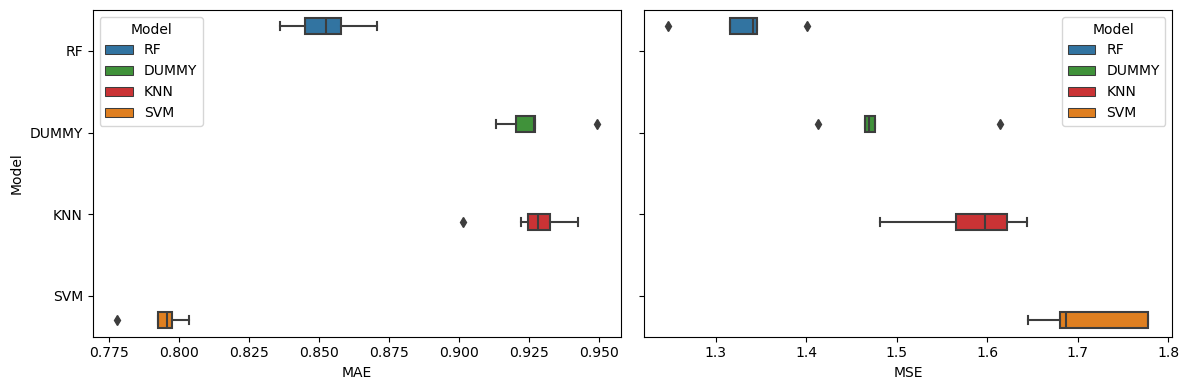

In [36]:
fig, axs = plt.subplots(1, 2, figsize= (12, 4))
sns.boxplot(data=reg_metrics, x="MAE", y="Model", hue = 'Model', ax=axs[0], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics, x="MSE", y="Model", hue = 'Model', ax=axs[1], palette=sns.color_palette('Paired')[1::2])
axs[1].set_yticklabels('')
axs[1].set_ylabel('')
plt.tight_layout()
plt.show()

# *Nota:*
siamo sicuri che game id non causi information leakage? Mi sembra una cosa molto strana che per la gini importance sia più importante quello rispetto a chi sia il giocatore

In [37]:
print(gini_importances)

    GAME_ID   TEAM_ID  PLAYER_ID  OPPOSING_TEAM_ID  LOCATION    SEASON
0  0.283649  0.158070   0.277175          0.173306  0.034002  0.073797
1  0.285190  0.158548   0.276747          0.170412  0.034728  0.074375
2  0.285347  0.158001   0.278067          0.169704  0.034193  0.074689
3  0.284475  0.156832   0.278350          0.172131  0.034675  0.073537
4  0.281098  0.154641   0.290191          0.168163  0.034211  0.071696


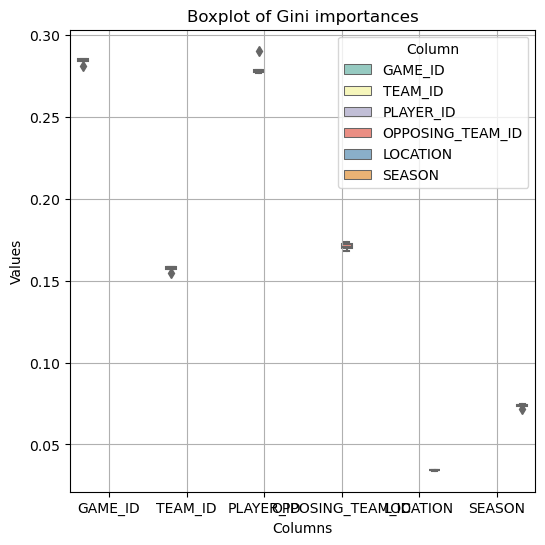

In [38]:
melted_gini = gini_importances.melt(var_name='Column')

# Create boxplot with seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x='Column', y='value', data=melted_gini, hue='Column', palette='Set3')

plt.title('Boxplot of Gini importances')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.legend(title='Column')
plt.grid(True)
plt.show()